# Read CSV and Make Graphs

#### Import python modules

In [20]:
import csv
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from tabulate import tabulate

##### Read CSV from file

| Comune          | Provincia | Regione | Nome                           | Tipo                                  | Anno inserimento | Identificatore OSM | Longitudine  | Latitudine  |
|----------------|----------|--------|--------------------------------|--------------------------------------|------------------|--------------------|------------|------------|
| Abano Terme   | PADOVA   | Veneto | Cristoforo Colombo           | Monumento                            | 2011             | 1535382684        | 11.7867885 | 45.3482471 |
| Abbadia Lariana | LECCO  | Lombardia | Monumento all'Alpino       | Monumento commemorativo, sacrario   | 2015             | 3326001705        | 9.3960522  | 45.9102    |
| Abbiategrasso | MILANO   | Lombardia | Castello                    | Monumento                            | 2009             | 598558462         | 8.9192179  | 45.3984929 |
| Abbiategrasso | MILANO   | Lombardia | Ponte Medievale             | Monumento                            | 2009             | 598558463         | 8.9199045  | 45.3979354 |
| Acate         | RAGUSA   | Sicilia  | Arco di San Giuseppe        | Monumento                            | 2013             | 2431640930        | 14.4933049 | 37.0266168 |
| ...         | ...   | ...  | ...        | ...                            | ...             | ...        | .... | ... |




In [13]:
data = []
with open(file="mappa_monumenti_IT.csv", mode='r', encoding="ISO-8859-1") as file:
    reader = csv.reader(file)
    next(reader)
    data = [(row[0], row[3], row[8], row[7]) for row in reader if row[0] == 'Monza']
    for row in data:
        data[data.index(row)] += (f"https://www.google.com/maps/search/?api=1&query={row[2]},{row[3]}",)

#Markdown format
print(tabulate(data, headers=["Comune", "Provincia", "X", "Y", "Maps"], tablefmt="pipe"))



| Comune   | Provincia                        |       X |       Y | Maps                                                                        |
|:---------|:---------------------------------|--------:|--------:|:----------------------------------------------------------------------------|
| Monza    | Agli aviatori caduti             | 45.5816 | 9.27091 | https://www.google.com/maps/search/?api=1&query=45.5815787,9.2709097        |
| Monza    | Crocifisso                       | 45.5834 | 9.27493 | https://www.google.com/maps/search/?api=1&query=45.5834344,9.2749339        |
| Monza    | Juan Manuel Fangio               | 45.6188 | 9.28312 | https://www.google.com/maps/search/?api=1&query=45.6187535999999,9.2831195  |
| Monza    | Monumento a Giuseppe Garibaldi   | 45.5849 | 9.27762 | https://www.google.com/maps/search/?api=1&query=45.5849107,9.2776192        |
| Monza    | Monumento a Giuseppe Garibaldi   | 45.5901 | 9.27465 | https://www.google.com/maps/search/?api=1&query=45.59009

#### Make Graph

###### Zipping list

```python
# EXAMPLE
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']
zipped = zip(list1, list2)
print(list(zipped))
```


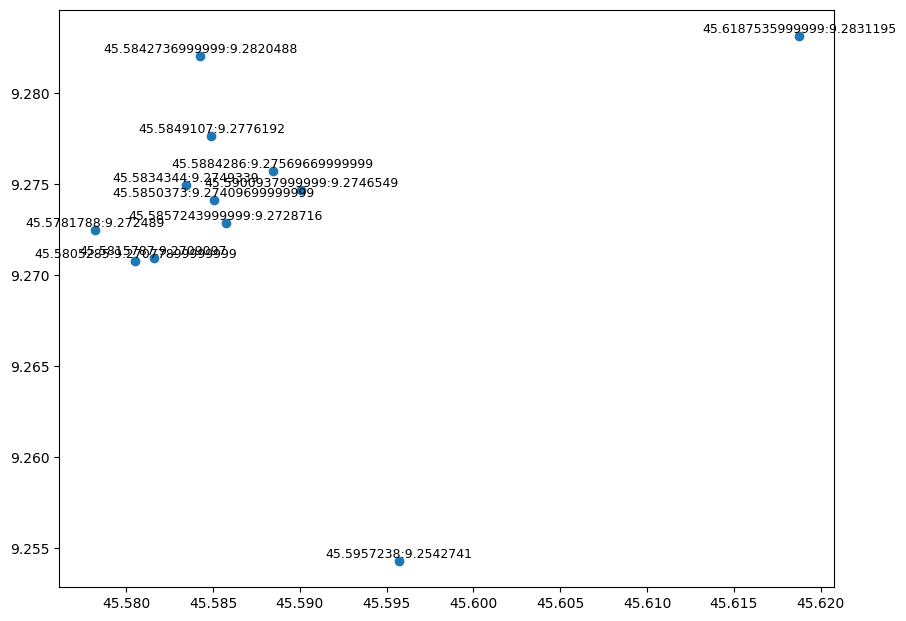

In [23]:
if data:
    xlist, ylist = zip(*[(float(row[2]), float(row[3])) for row in data])
    plt.figure(figsize=(10, 7.5))
    plt.scatter(xlist, ylist, marker="o")
    
    for i in range(len(xlist)):
        #           X       Y           TEXT
        plt.text(xlist[i], ylist[i], f'{xlist[i]}:{ylist[i]}', fontsize=9, ha='center', va='bottom')
    
    plt.show()  # Show the window